<h1>Intro to Computer Music, Lab3</h1>
<h2>Gus Xia, NYU Shanghai</h2>

In this lab you will:
0. create more sound from scratch
1. reproduce some examples used in the lecture
2. hopefully, gain a better understanding of frequency domain representation


Again, here is a jupyter notebook cheat sheet:
https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/

<h2> Load packages </h2>



In [21]:
# To begin using librosa we need to import it, and other tools such as matplotlib and numpy
from operator import add
from pylab import *
import librosa             # The librosa library
import librosa.display     # librosa's display module (for plotting features)
import IPython.display     # IPython's display module (for in-line audio)
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms   # plotting style
import numpy as np              # numpy numerical functions
ms.use('seaborn-muted')         # fancy plot designs
from __future__ import print_function # use the print() function from Python3

<h2>Recap: A pure sine wave </h2>


In [22]:
# create a sine wave from scratch 
# try to modify some parameters
A = 1;
f = 440;
#f = 440 * 11
phi = 0;
sr = 44100;
#sr = 4410
T = 5;
y = [A * sin(2*pi*f*t + phi) for t in arange(0.,T,1./sr)]
# write it as a function
IPython.display.Audio(data=y, rate=sr) # press the "play" button to hear audio


<h2> Time Vs. Spectrum </h2>

Time domain function:


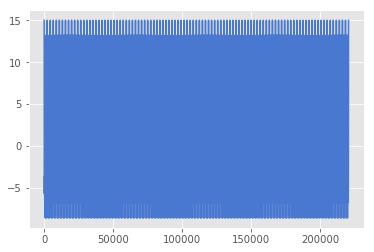

In [23]:
def cos_wave(A, f, t, sr):
    return [A * cos(2*pi*f*t) for t in arange(0.,t,1./sr)]
def cos_waves(As, fs, t, sr):
    if type(As) != type(fs):
        print("Error: type of A and f should match\n")
        return
    if type(As) != list and type(fs) != list:
        return cos_wave(As, fs, t, sr)
    if len(As) != len(fs):
        print("Error: length of A and f should match\n")
        return
    index = 0
    wave = cos_wave(As[index], fs[index], t, sr)
    while index < len(As)-1:
        index = index + 1
        wave = np.add(wave, cos_wave(As[index], fs[index], t, sr))
    return wave
# test function  
As = [1,2,4,8]
fs = [440,320,200,100]
y = cos_waves(As, fs, T, sr)
plt.plot(y)
#librosa.display.waveplot(array(y))
plt.show()
IPython.display.Audio(data=y, rate=sr) # press the "play" button to hear audio


<h3> That took some time and the plot looks bad, ... why?
So, how about: </h3>

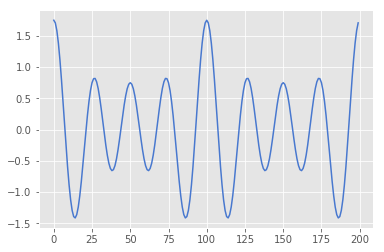

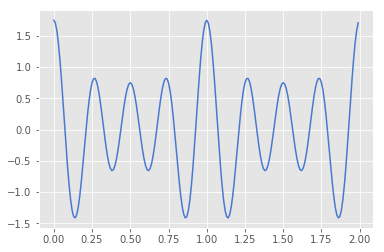

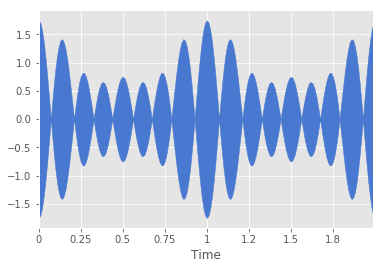

In [24]:
T = 2
sr = 100
As = [1,0.5,0.25]
fs = [4,3,2]
y = cos_waves(1, 1, T, sr)
y2 = cos_waves(As, fs, T, sr)
plt.plot(y2)
plt.show()
plt.plot(arange(0.,T,1./sr),y2)
plt.show()
librosa.display.waveplot(array(y2),sr = 100)
plt.show()
IPython.display.Audio(data=y2, rate=sr * 500) # press the "play" button to hear audio


<h3>Q0: Now the above plots look much better, but you cannot hear it. Why? </h3>

In [25]:
print("Because the frequency of the wave is too low")
print("With a relatively low sample rate it is impossible to hear")

Because the frequency of the wave is too low
With a relatively low sample rate it is impossible to hear


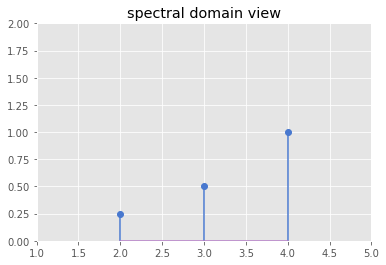

In [26]:
# spectrum domain function
# Assuming everything is continues, and the signal is infinite long
def show_spect(fs, As):
    if type(As) != type(fs):
        print("Error: type of A and f should match\n")
        return
    if type(As) != list and type(fs) != list:
        As = [As]
        fs = [fs]
    if len(As) != len(fs):
        print("Error: length of A and f should match\n")
        return
    # stem plot
    plt.stem(fs,As)
    # set the axes view
    axes = plt.gca()
    axes.set_xlim([min(fs)-1,max(fs)+1])
    axes.set_ylim([0,max(As)+1])
    plt.title('spectral domain view')
    plt.show()

# test function
#show_spect(1,1)
#show_spect([0,1],[0,3,4,2,0])
#show_spect([0,1,2,4,5],[0,3,4,2,0])
show_spect(fs, As)


<h2>Impulse train</h2>

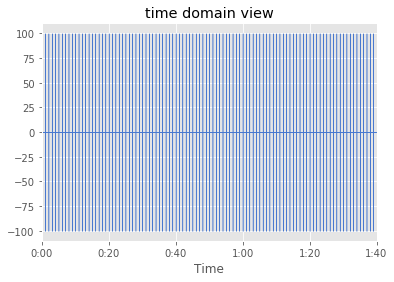

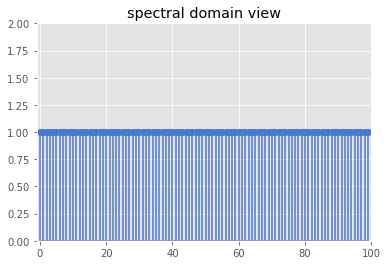

In [27]:
# Now let's  create an impalse train using waves of different freq
L = 100
# As = np.ones((1,L))[0].tolist()
As = [1] * L
#print(len(As))
fs = arange(0,L,1).tolist()
#print(fs)
y3 = cos_waves(As, fs, L, sr)

# Time domain view
librosa.display.waveplot(array(y3), sr)
#plt.plot(arange(0.,T*10,1./sr),y3)
plt.title('time domain view')
plt.show()
# spectral domain view
show_spect(fs, As)

<h3> Cool, you just created a "proof". But wait... why do we create such a "simple" signal in such a "complicated" way? What do you learn? </h3>

In [28]:
print("Simple wave in time domain can contain complex information in spectral domain")

Simple wave in time domain can contain complex information in spectral domain


<h3> Q2: In the same manner, try to create 1) a "saw wave" or a "square wave" and 2) some other "simple" time-domain wave forms you can think of. </h3> 

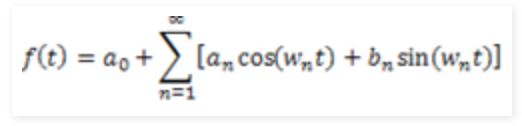
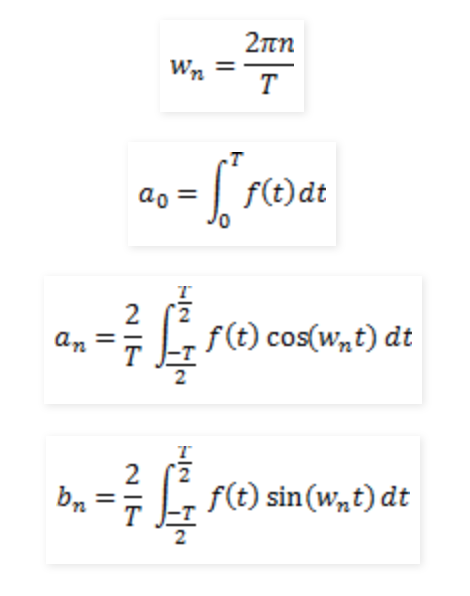

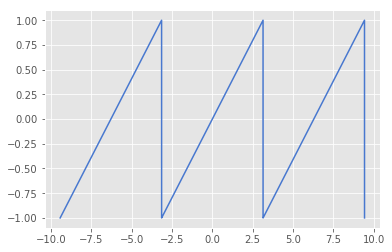

In [29]:
from scipy import signal
f = 0.5 / np.pi
period = 1 / f
t = np.linspace(-3 * np.pi, 3 * np.pi, 10000)
y = signal.sawtooth(2 * np.pi * f * (t - np.pi))
plt.plot(t, y.tolist())
plt.show()

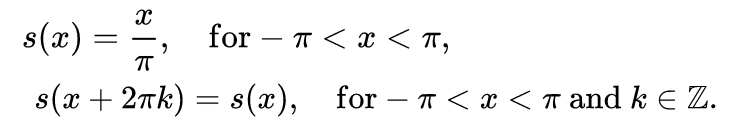
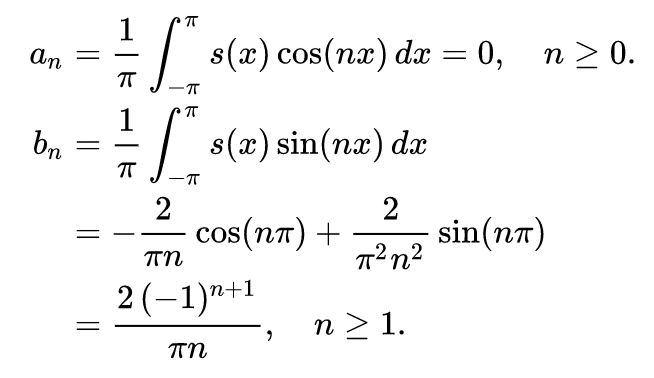

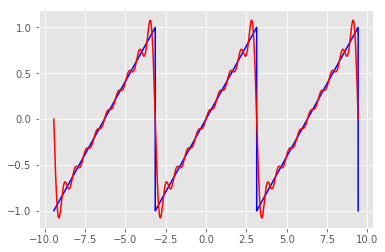

In [30]:
def bn_saw(n):
    n = int(n)
    return 2 * (-1 ** (n + 1)) / (np.pi * n)

# an_saw = 0 for each T

def wn(n, T):
    return 2 * np.pi * n / T

# a0 = 0 for each T

def fourier_saw(n_max, xs, T):
    a0 = 0
    summing = a0
    for n in range(1, n_max):
        summing += bn_saw(n) * np.sin(wn(n, T) * (xs - np.pi))
    return summing

max_n = 10
fs = fourier_saw(max_n, t, period)
fs = fs.tolist()

plt.style.use("ggplot")
plt.plot(t, y, color="blue", label="Signal")
plt.plot(t, fs, color="red", label="Fourier series approximation")
plt.show()
IPython.display.Audio(data=y, rate=sr * 100)

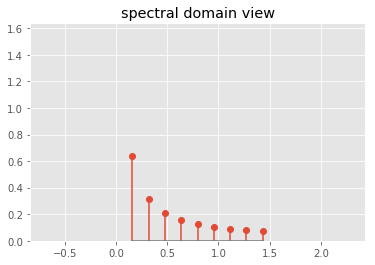

In [31]:
fs = [n / (2 * np.pi) for n in range(1, max_n)]
As = [abs(bn_saw(n)) for n in range(1, max_n)]
show_spect(fs, As)

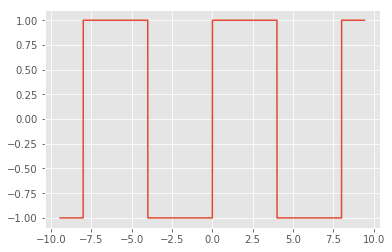

In [32]:
f = 1 / 8
period = 1 / f
t = np.linspace(-3 * np.pi, 3 * np.pi, 10000)
y = signal.square(2 * np.pi * f * t)
plt.plot(t, y.tolist())
plt.show()

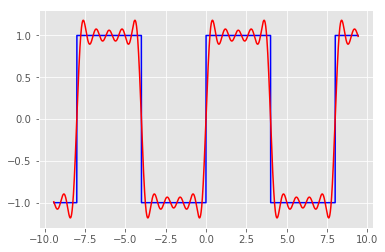

In [33]:
def bn_square(n):
    n = int(n)
    if (n%2 != 0):
        return 4 / (np.pi*n)
    else:
        return 0

# an_saw = 0 for each T

def wn(n, T):
    return 2 * np.pi * n / T

# a0 = 0 for each T

def fourier_square(n_max, xs, T):
    a0 = 0
    summing = a0
    for n in range(1, n_max):
        summing += bn_square(n) * np.sin(wn(n, T) * xs)
    return summing

max_n = 10
fs = fourier_square(max_n, t, period)
fs = fs.tolist()

plt.style.use("ggplot")
plt.plot(t, y, color="blue", label="Signal")
plt.plot(t, fs, color="red", label="Fourier series approximation")
plt.show()
IPython.display.Audio(data=y, rate=sr * 100)

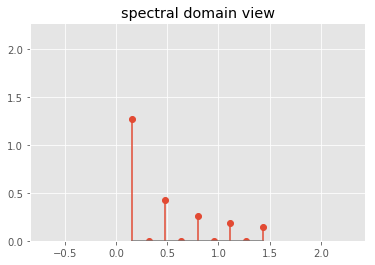

In [34]:
fs = [n / (2 * np.pi) for n in range(1, max_n)]
As = [abs(bn_square(n)) for n in range(1, max_n)]
show_spect(fs, As)

<h2>Creation: from a spectral-domain perspective. Let's take "aliasing" for an example</h2>

In [35]:
f0 = 300;
ratio = 2
ratio = 2**(1./7)
yy = []
for i in range(0,1000):
    y = cos_wave(random(), f0 * (ratio**i), random(), 1000.)
    yy = yy + y

IPython.display.Audio(data=yy, rate=4410) 

<h3>That is playing with spectral domain (indirectly)! Question 3 (Bonus): Why we hear more "noise" toward the end? </h3>

In [36]:
print("As the frequency of the domain keeps increasing")
print("Once the frequency is too large")
print("The points on the wave become very small float numbers")
print("And the precision of that float is not accurate")
print("As Python float does not have that many digits to store the small float numbers")
print("Thus the wave is not accurate anymore because of the Python float precision problem")
print("Thus the original periodic behavior of the wave is lost due to imprecise wave points")
print("Thus we are sampling from some random waves with damaged information")
print("Then we hear white noise when the information lost is severe")

As the frequency of the domain keeps increasing
Once the frequency is too large
The points on the wave become very small float numbers
And the precision of that float is not accurate
As Python float does not have that many digits to store the small float numbers
Thus the wave is not accurate anymore because of the Python float precision problem
Thus the original periodic behavior of the wave is lost due to imprecise wave points
Thus we are sampling from some random waves with damaged information
Then we hear white noise when the information lost is severe


<h2>Creation: from a time-domain perspective. Let's take bit-wise operation for an example</h2>

In [37]:
wave = [min(x & x >> 8, 1) for x in range(100000)]
IPython.display.Audio(data = wave, rate=4410)

<h3>Q4: plot the wave to see the regularity of this strange signal, describle your observation. Hint: there are different ways to plot. To have a line going through all the points is not always a good idea. It may kill the details</h3>

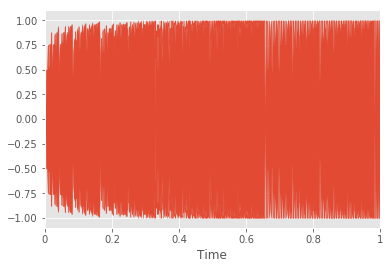

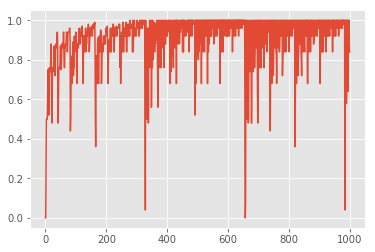

In [38]:
wave = np.array(wave)

l = []
for i in range(0,len(wave),100):
    l.append(np.mean(wave[i:i+100]))
    
librosa.display.waveplot(np.array(l), 1000)
plt.show()

plt.plot(l) 
plt.show()

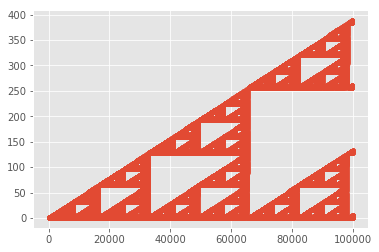

In [39]:
wave = [x & x >> 8 for x in range(100000)]
plot(wave, '.')
plt.show()
IPython.display.Audio(data = wave, rate=4410)